# Explore here

In [409]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# metricas
from sklearn.metrics import silhouette_score

# reduccion de dimensionalidad
from sklearn.decomposition import PCA

import warnings


In [410]:
warnings.filterwarnings("ignore")

In [411]:
data_1 = "C://Users//samue//OneDrive//Escritorio//4GeeksAcademy//25a clase-Aprendizaje_no_supervisado//unsupervised-ML//data//raw//data.csv"

df = pd.read_csv(data_1)

In [412]:
print(df.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


In [413]:
columns = ['Latitude','Longitude','MedInc']

In [414]:
df = df[columns]
df

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [415]:
X = df

In [416]:
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

## K-Means

In [417]:
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [418]:
centroids = model.cluster_centers_
labels = model.labels_

In [419]:
train_labels = model.predict(X_train)
test_labels = model.predict(X_test)

In [420]:
X_test['cluster'] = test_labels

In [421]:
X_train['cluster'] = labels

In [422]:
X_con = pd.concat((X_test, X_train), axis = 0)

In [426]:
X_con.head()

,Latitude,Longitude,MedInc,cluster
20046,36.06,-119.01,1.6812,0
3024,35.14,-119.46,2.5313,0
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,3
9814,36.62,-121.93,3.7250,5


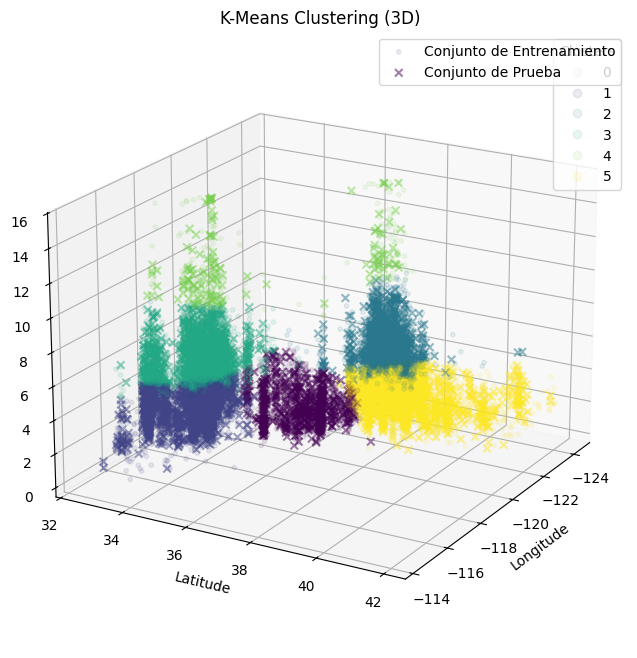

In [429]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot para el conjunto completo (X_train)
scatter = ax.scatter(X_train['Longitude'], X_train['Latitude'], X_train['MedInc'],
                     c=X_train['cluster'], cmap='viridis', s=10, label='Conjunto de Entrenamiento', alpha=0.1)
# Scatter plot para el conjunto de prueba (X_test)
# Asumiendo que X_test tiene las mismas columnas y una columna 'cluster' para el color
scatter_test = ax.scatter(X_test['Longitude'], X_test['Latitude'], X_test['MedInc'],
                          c=X_test['cluster'], cmap='viridis', marker='x', s=30, label='Conjunto de Prueba', alpha=0.5)
ax.set_title('K-Means Clustering (3D)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('MedInc')
# Ángulo de vista
ax.view_init(elev=20, azim=30)
# Leyenda
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)
# Agregar leyenda para el conjunto de prueba
plt.legend(loc='upper right')
plt.show()

In [ ]:
k_values = range(2, 21)
inertias = []

# Calcular la inercia para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Imprimir las inercias para cada k
for k, inertia in zip(k_values, inertias):
    print(f'k = {k}, Inercia = {inertia}')

# Graficar la inercia en función de k
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Inercia vs. Número de Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()